In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# we can Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# dont train existing weights.
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for folders getting no. of outputs classes.

folders = glob('Datasets/train/*')

In [7]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [8]:
# our layers - you can add more if you want.

x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs= prediction)

In [10]:
# View the structure of the model.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization to use.
model.compile(
   loss='categorical_crossentropy',
   optimizer= 'adam',
   metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same image size as initialized for the image size.

training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')


Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. it will take time to execute.
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/50
2/2 [==============================] - 46s 23s/step - loss: 4.5517 - accuracy: 0.4844 - val_loss: 7.4848 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 40s 20s/step - loss: 3.7178 - accuracy: 0.7500 - val_loss: 11.4803 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 40s 20s/step - loss: 0.7481 - accuracy: 0.9219 - val_loss: 9.6137 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 40s 20s/step - loss: 1.0584 - accuracy: 0.9219 - val_loss: 9.5384 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 40s 20s/step - loss: 1.2845 - accuracy: 0.9062 - val_loss: 14.0582 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 40s 20s/step - loss: 4.0153e-06 - accuracy: 1.0000 - val_loss: 17.6864 - val_accuracy: 

In [16]:
r.history

{'loss': [4.551668405532837,
  3.7178425788879395,
  0.7480554264038801,
  1.0584211629284255,
  1.284462974557755,
  4.015347258246038e-06,
  7.015682604105677e-05,
  2.421437972355278e-08,
  1.0326543815608602e-05,
  0.00826809270074591,
  0.4441645298347794,
  0.006244972348213085,
  0.028645107777265366,
  0.11266440338363282,
  0.004211263381876051,
  0.0,
  6.756087532266974e-05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019362488753529306,
  0.0,
  0.0,
  1.8626450382086546e-09,
  0.04453746974468231,
  0.0,
  3.687995873136174e-07,
  1.8626450382086546e-09,
  9.12693423060773e-08,
  6.89177213075709e-08,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.8626450382086546e-09,
  0.008746889419853687,
  0.0,
  7.69827875046758e-06,
  5.587433042819612e-05,
  0.0,
  0.07241040468215942,
  0.0,
  0.1478853076696396,
  0.0,
  9.313223081619526e-09,
  0.0,
  5.4016616957142105e-08],
 'accuracy': [0.484375,
  0.75,
  0.921875,
  0.921875,
  0.90625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  1

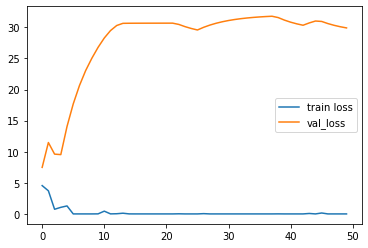

<Figure size 432x288 with 0 Axes>

In [17]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_Loss')

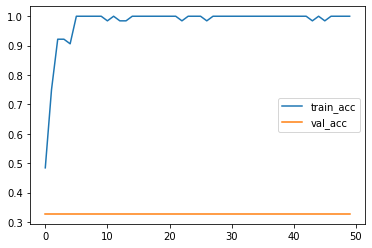

<Figure size 432x288 with 0 Axes>

In [18]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
#save it as h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[3.35046639e-21, 4.28487247e-20, 1.00000000e+00],
       [7.42403970e-21, 1.42364876e-20, 1.00000000e+00],
       [1.97136648e-21, 3.04986791e-20, 1.00000000e+00],
       [3.00273146e-21, 4.28046160e-20, 1.00000000e+00],
       [1.40401727e-20, 2.31980244e-19, 1.00000000e+00],
       [4.26596792e-21, 9.94975234e-20, 1.00000000e+00],
       [9.26216346e-21, 1.03865593e-19, 1.00000000e+00],
       [3.10499348e-21, 7.33715924e-20, 1.00000000e+00],
       [2.22851537e-20, 2.34938707e-19, 1.00000000e+00],
       [3.51631207e-21, 2.00995893e-19, 1.00000000e+00],
       [4.58678274e-21, 7.71672141e-20, 1.00000000e+00],
       [1.57496340e-21, 2.48557660e-20, 1.00000000e+00],
       [2.15355035e-20, 3.18371426e-19, 1.00000000e+00],
       [7.63735456e-21, 8.09915673e-20, 1.00000000e+00],
       [3.71611981e-21, 1.23733179e-19, 1.00000000e+00],
       [5.43104616e-21, 8.67098152e-20, 1.00000000e+00],
       [3.56339795e-21, 1.14051404e-19, 1.00000000e+00],
       [6.55901921e-21, 2.09583

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model = load_model('model_resnet50.h5')

In [26]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg', target_size=(224,224))

In [27]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\Admin\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [28]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [33]:
model.predict(img_data)

array([[2.7611111e-14, 2.4287467e-14, 1.0000000e+00]], dtype=float32)

In [34]:
a = np.argmax(model.predict(img_data))

In [35]:
a==1

False

In [36]:
a

2